In [1]:
%run geometria.ipynb

In [2]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [12]:
# sprawdzanie, po której stronie odcinka leży punkt - funkcje pomocnicze
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]

def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else:        # współliniowe
        return 0
    
# wizualizacja algorytmu
def get_lines(s, scenes, points):
    lines = []
    
    for i in range(len(s)-1):
        lines.append([s[i], s[i+1]])
    lines.append([s[-1], s[0]])
    
    scene = Scene([PointsCollection(points, color = "thistle"),PointsCollection(s, color = "hotpink")], [LinesCollection(lines, color = "hotpink")])
    scenes.insert(0,scene)
    
    return scenes

def add_scene(points, s, scenes, i):
    scenes.append(Scene([PointsCollection(points, color = "thistle"),
                                 PointsCollection(s.copy(), color = "hotpink"),
                                PointsCollection([points[i]], color = "cyan")],
                                [LinesCollection([(s[i], s[i + 1]) for i in range(len(s) - 1)], color = "hotpink"),
                                 LinesCollection([(points[i], s[-1])], color = "cyan")]))
    return scenes

# Główny algorytm

In [15]:
def Jarvis(points):
    elem = min(points, key = lambda x: (x[1], x[0]))
    scenes, s = [], []
    p = elem
    flag = True
    n = len(points)
    
    while p != elem or flag is True:
        flag = False
        point = points[0]
        s.append(p)
        
        for i in range(n):
            
            if orient(p, point, points[i]) == -1 or (orient(p, points[i], point) == 0 and dist(p, points[i]) > dist(p, point)):
                point = points[i]
                scenes = add_scene(points,s,scenes,i)
    
        p = point
    
    scenes = get_lines(s, scenes,points)
        
    return scenes

# Testowanie

<IPython.core.display.Javascript object>


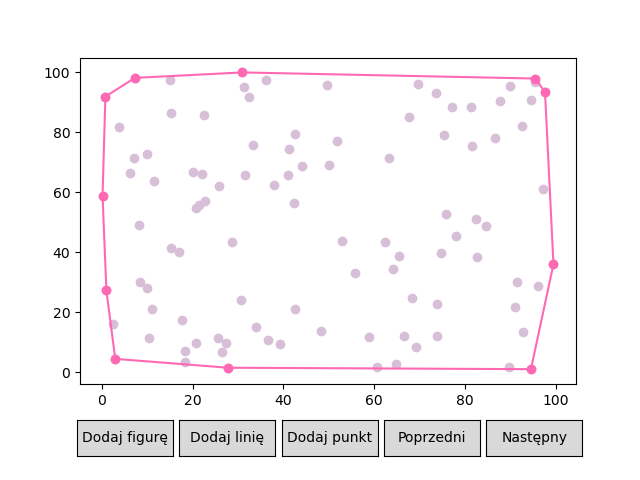

In [16]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))


data = generate_points(100, 0, 100)
scenes = Jarvis(data)
plot = Plot(scenes=scenes)
plot.draw()

# Algorytm bez wizualizacji

In [ ]:
def Jarvis_(points):
    elem = min(points, key = lambda x: (x[1], x[0]))
    s =  []
    p = elem
    flag = True
    n = len(points)
    
    while p != elem or flag is True:
        flag = False
        point = points[0]
        s.append(p)
        
        for i in range(n):
        
            if orient(p, point, points[i]) == -1 or (orient(p, points[i], point) == 0 and dist(p, points[i]) > dist(p, point)):
                point = points[i]
    
        p = point
        
    return s